## Несмещенная оценка дисперсии

### Цель

Научиться оценивать дисперсию в выборке таким образом, чтобы полученная оценка была более точной и не содержала систематической ошибки, называемой смещением.

### Задание

Поглядим внимательно еще раз на историю про число степеней свободы выборки.

Вы занялись бегом и решили вести учет своих достижений. Вы бегаете вокруг озера. В среднем круг занимает 20 минут, но так как вы бегун начинающий, результат у вас пока нестабильный: иногда лучше, иногда хуже. Время вашего круга распределено нормально, а дисперсия равна 9 (но вы этого пока не знаете). За раз вы пробегаете 5 кругов, считаете время каждого круга, находите среднее и считаете дисперсию.  

1.1.   Просимулируйте 100 000 тренировок по 5 кругов (считаем, что все 100 000 тренеровок вы бежите без прогресса, с одним распределением). Для каждой тренировки найдите выборочную смещенную дисперсию (просто дисперсию). \\
1.2.  Постройте гистограмму дисперсий, найдите среднее значение дисперсии, нанесите на график.


2.1  Постройте массив из 100 000 значений, где каждое значение получено суммированием квадратов четырех нормальных величин с матожиданием 0 и дисперсией 9 и делением этой суммы на 5. \\

*Комментарий:* иными словами нужно рассмотреть $$y = \frac{1}{4} \sum_{i=1}^{n=4} x_i^2, \quad x \sim N(0, 3).$$
2.2.  Постройте гистограмму дисперсий, найдите среднее значение дисперсии, нанесите на график.

3. Нанесите обе гистограммы на один график.

4. Ответьте на вопрос: Что это за распределение?

5. Ответьте на вопрос: Как найти несмещенную дисперсию?

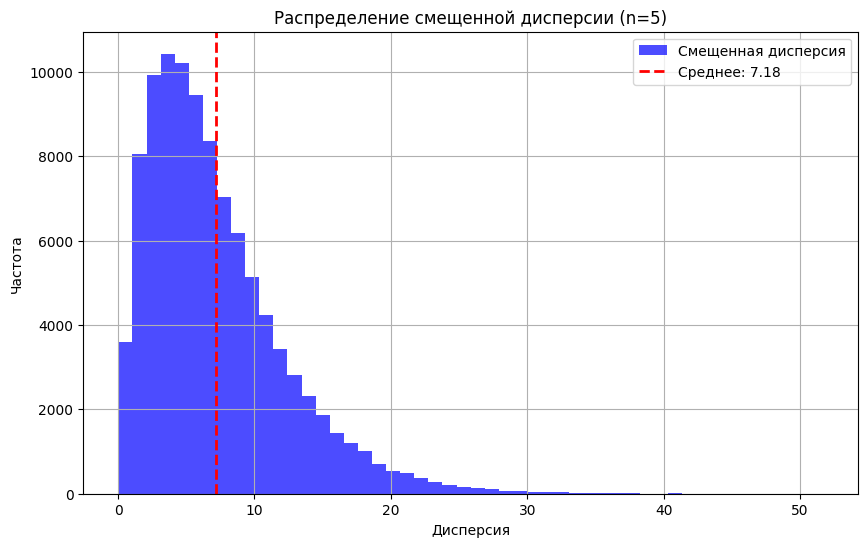

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
mu = 20  # среднее время круга (мин)
sigma = 3  # стандартное отклонение (корень из дисперсии 9)
n_samples = 100000
n_laps = 5

# Генерация данных: 100000 тренировок по 5 кругов
data = np.random.normal(mu, sigma, (n_samples, n_laps))

# Вычисление смещенной дисперсии для каждой тренировки
biased_variances = np.var(data, axis=1, ddof=0)

# Гистограмма смещенных дисперсий
plt.figure(figsize=(10, 6))
plt.hist(biased_variances, bins=50, alpha=0.7, color='blue', label='Смещенная дисперсия')
plt.axvline(biased_variances.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {biased_variances.mean():.2f}')
plt.xlabel('Дисперсия')
plt.ylabel('Частота')
plt.title('Распределение смещенной дисперсии (n=5)')
plt.legend()
plt.grid()
plt.show()

Среднее значение смещенной дисперсии будет близко к:

![alt text](<Screenshot from 2025-04-23 06-44-54.png>)

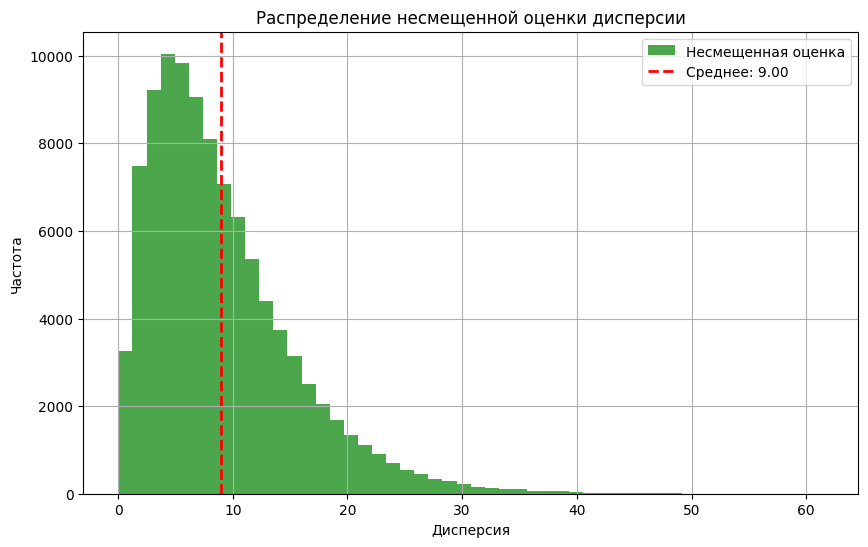

In [2]:
# Массив из 100 000 значений (несмещенная оценка)

# Генерация 100000 значений по формуле y = (1/4) * sum(x_i^2), где x_i ~ N(0, 3)
x = np.random.normal(0, sigma, (n_samples, 4))
y = np.sum(x**2, axis=1) / 4

# Гистограмма для y
plt.figure(figsize=(10, 6))
plt.hist(y, bins=50, alpha=0.7, color='green', label='Несмещенная оценка')
plt.axvline(y.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {y.mean():.2f}')
plt.xlabel('Дисперсия')
plt.ylabel('Частота')
plt.title('Распределение несмещенной оценки дисперсии')
plt.legend()
plt.grid()
plt.show()

Среднее значение несмещенной оценки

Среднее значение yy будет близко к:

![alt text](<Screenshot from 2025-04-23 06-47-25.png>)

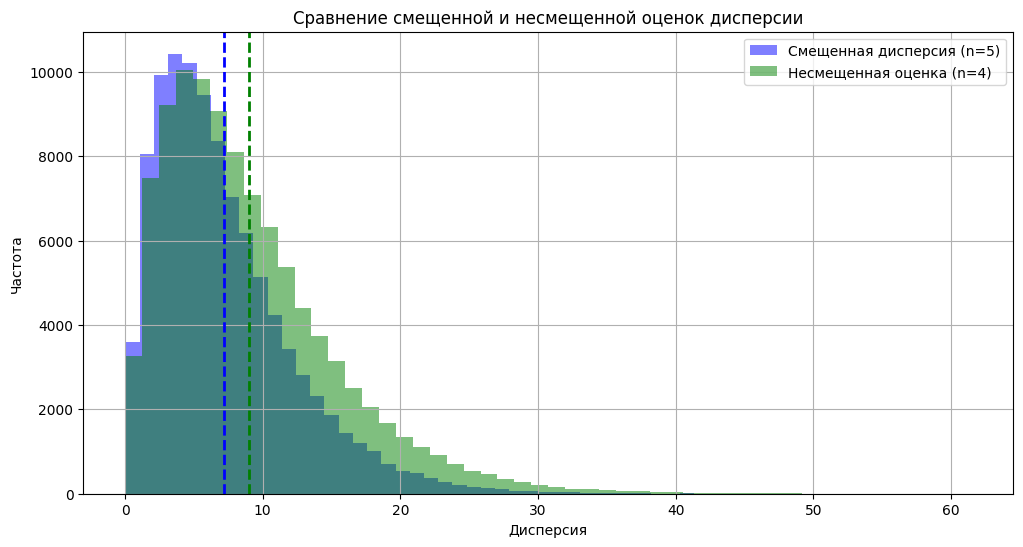

In [3]:
# Совмещенные гистограммы

plt.figure(figsize=(12, 6))
plt.hist(biased_variances, bins=50, alpha=0.5, color='blue', label='Смещенная дисперсия (n=5)')
plt.hist(y, bins=50, alpha=0.5, color='green', label='Несмещенная оценка (n=4)')
plt.axvline(biased_variances.mean(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(y.mean(), color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Дисперсия')
plt.ylabel('Частота')
plt.title('Сравнение смещенной и несмещенной оценок дисперсии')
plt.legend()
plt.grid()
plt.show()

    Смещенная дисперсия: Распределение выборочной дисперсии (с делением на n) для выборки из 5 элементов. Это смещенная оценка, её среднее значение меньше истинной дисперсии.

    Несмещенная оценка: Распределение суммы квадратов нормальных величин, деленной на n−1. Это несмещенная оценка дисперсии, её среднее равно σ2=9.

Распределение для y — это Гамма-распределение или распределение хи-квадрат, поскольку ∑xi^2​ для xi∼N(0,σ) следует σ^2⋅χ^2(n).

Несмещенная оценка дисперсии вычисляется по формуле:

![alt text](<Screenshot from 2025-04-23 06-51-58.png>)

где:

    n — размер выборки,

    xˉ — выборочное среднее.

In [4]:
unbiased_variances = np.var(data, axis=1, ddof=1)  # ddof=1 для несмещенной оценки
print(f"Среднее несмещенной дисперсии: {unbiased_variances.mean():.2f}")

Среднее несмещенной дисперсии: 8.97


### Результат

Решение для задания предоставляется в виде программного кода на языке Python и ответов на вопросы.

### Критерии оценивания

К1 - за каждый выполненный верно пункт задания (+ 1 балл)

Максимальное количество баллов — 7 баллов.

Минимальное количество баллов, чтобы преподаватель смог зачесть вашу работу — 4 балла.